# Exploratory Analysis of Credit Card Defaults

## Importing the Data and Libraries

In [29]:
import pandas as pd
import matplotlib as mpl
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
creditDefault = pd.read_csv('default of credit card clients.csv', header = 1)

## Remove the ID Column

In [85]:
del creditDefault['ID']

## Remove Gender to Prevent Discrimination

In [57]:
del creditDefault['SEX']

## Inspect the Head

In [86]:
creditDefault.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Summary of file

In [87]:
creditDefault.describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [88]:
creditDefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL                     30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                

## Balance Limit Histogram

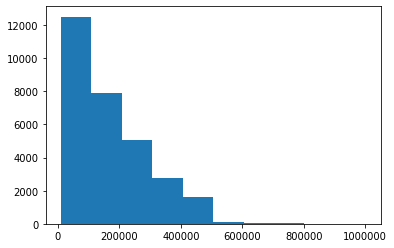

In [21]:
header = creditDefault.dtypes.index
plt.hist(creditDefault['LIMIT_BAL'])
plt.show()

## Balance Limit Histogram w/4 Bins

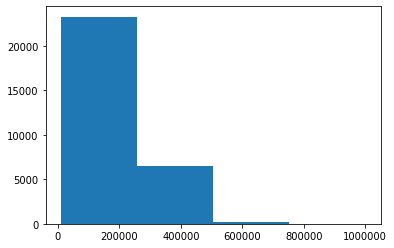

In [23]:
plt.hist(creditDefault['LIMIT_BAL'], bins=4)
plt.show()

## Age Distribution Histogram

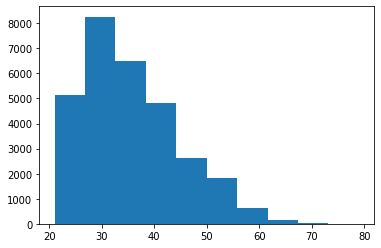

In [25]:
plt.hist(creditDefault['AGE'])
plt.show()

## Education and Defaults

In [32]:
creditDefault.groupby(['EDUCATION', 'default payment next month'])['EDUCATION'].count()

EDUCATION  default payment next month
0          0                                14
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
6          0                                43
           1                                 8
Name: EDUCATION, dtype: int64

## Isolate Defaulted Accounts

In [ ]:
creditDefaultTrue = creditDefault[creditDefault['default payment next month'] == 1]

## Remove Zero Dollar Final Bill Amounts and Negative Bill Amounts

In [117]:
creditDefaultTrue = creditDefaultTrue[creditDefaultTrue['BILL_AMT6'] > 0]
creditDefaultTrue.describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.00000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,...,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.0
mean,122693.275676,1.910631,1.530991,35.558378,0.79009,0.687207,0.608649,0.531171,0.469730,0.454955,...,49251.121802,46817.135856,45877.477477,3754.161261,3809.907748,3789.301261,3629.280901,3835.073514,3767.007748,1.0
std,110912.492363,0.711828,0.526496,9.658734,1.35861,1.401476,1.400897,1.413583,1.378752,1.346604,...,67593.265342,64545.822887,62189.847870,10044.189811,12659.598122,13832.660953,12054.530909,12960.681681,13305.136089,0.0
min,10000.000000,1.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-30481.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,28.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8530.750000,8538.250000,8254.000000,300.000000,396.000000,349.000000,346.000000,496.000000,323.250000,1.0
50%,80000.000000,2.000000,2.000000,34.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25225.000000,23428.500000,23173.000000,1972.500000,1900.000000,1500.000000,1300.000000,1500.000000,1300.000000,1.0
75%,180000.000000,2.000000,2.000000,42.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,...,60645.750000,56411.500000,55495.000000,3818.250000,3800.000000,3426.750000,3218.000000,3486.250000,3100.000000,1.0
max,740000.000000,6.000000,3.000000,73.000000,8.00000,7.000000,8.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,287982.000000,1.0


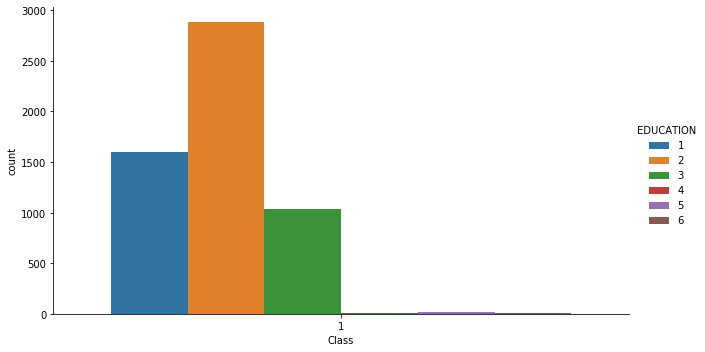

In [115]:
g = sns.factorplot('default payment next month', data=creditDefaultTrue, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('Class')

## Education and Non Defaults

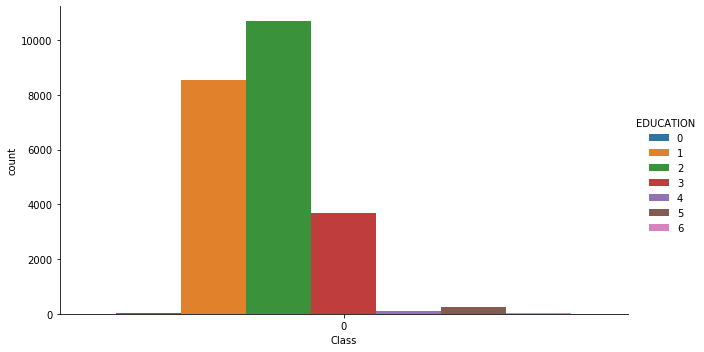

In [84]:
g = sns.catplot('default payment next month', data=creditDefaultFalse, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('Class')

## Marriage Status and Defaults

In [108]:
creditDefault.groupby(['MARRIAGE', 'default payment next month'])['MARRIAGE'].count()

MARRIAGE  default payment next month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: MARRIAGE, dtype: int64

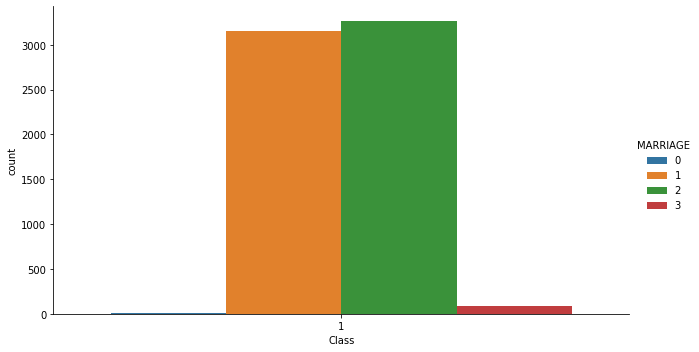

In [109]:
g = sns.factorplot('default payment next month', data=creditDefaultTrue, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('Class')

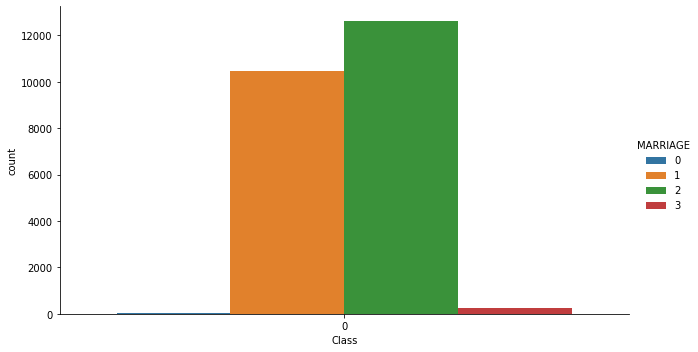

In [110]:
g = sns.factorplot('default payment next month', data=creditDefaultFalse, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('Class')

## Bill Amount 1 Boxplot

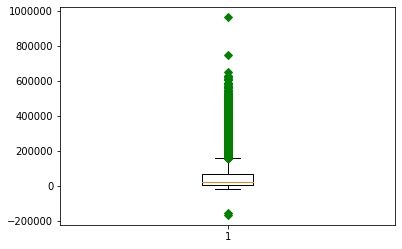

In [62]:
A = creditDefault['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

## Correlation

In [111]:
corrMat = creditDefault.corr()
print(corrMat)

                            LIMIT_BAL  EDUCATION  MARRIAGE       AGE  \
LIMIT_BAL                    1.000000  -0.219161 -0.108139  0.144713   
EDUCATION                   -0.219161   1.000000 -0.143464  0.175061   
MARRIAGE                    -0.108139  -0.143464  1.000000 -0.414170   
AGE                          0.144713   0.175061 -0.414170  1.000000   
PAY_0                       -0.271214   0.105364  0.019917 -0.039447   
PAY_2                       -0.296382   0.121566  0.024199 -0.050148   
PAY_3                       -0.286123   0.114025  0.032688 -0.053048   
PAY_4                       -0.267460   0.108793  0.033122 -0.049722   
PAY_5                       -0.249411   0.097520  0.035629 -0.053826   
PAY_6                       -0.235195   0.082316  0.034345 -0.048773   
BILL_AMT1                    0.285430   0.023581 -0.023472  0.056239   
BILL_AMT2                    0.278314   0.018749 -0.021602  0.054283   
BILL_AMT3                    0.283236   0.013002 -0.024909  0.05

## Covariance

In [93]:
covMat = creditDefault.cov()
print(covMat)

                               LIMIT_BAL     EDUCATION     MARRIAGE  \
LIMIT_BAL                   1.683446e+10 -22474.028945 -7323.669658   
EDUCATION                  -2.247403e+04      0.624651    -0.059184   
MARRIAGE                   -7.323670e+03     -0.059184     0.272452   
AGE                         1.730767e+05      1.275380    -1.992764   
PAY_0                      -3.954593e+04      0.093584     0.011683   
PAY_2                      -4.603765e+04      0.115025     0.015122   
PAY_3                      -4.443225e+04      0.107861     0.020421   
PAY_4                      -4.057181e+04      0.100528     0.020213   
PAY_5                      -3.667056e+04      0.087340     0.021074   
PAY_6                      -3.509308e+04      0.074816     0.020616   
BILL_AMT1                   2.727020e+09   1372.377644  -902.154685   
BILL_AMT2                   2.570130e+09   1054.657595  -802.517866   
BILL_AMT3                   2.548533e+09    712.664124  -901.679085   
BILL_A

## Exploration of Bill Amounts and Pay Amounts of Defaulted Accounts

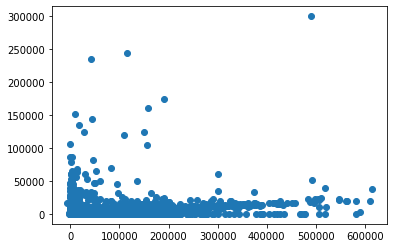

In [112]:
x = creditDefaultTrue['BILL_AMT1']
y = creditDefaultTrue['PAY_AMT1']
plt.scatter(x,y)
plt.show()

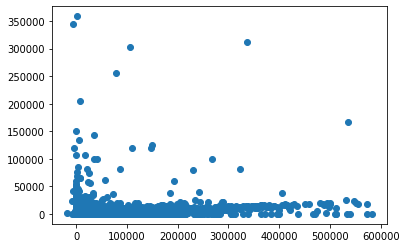

In [73]:
x = creditDefaultTrue['BILL_AMT2']
y = creditDefaultTrue['PAY_AMT2']
plt.scatter(x,y)
plt.show()

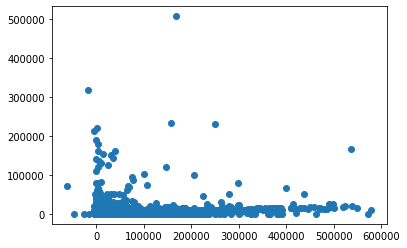

In [75]:
x = creditDefaultTrue['BILL_AMT3']
y = creditDefaultTrue['PAY_AMT3']
plt.scatter(x,y)
plt.show()

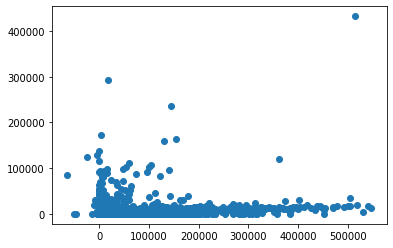

In [76]:
x = creditDefaultTrue['BILL_AMT4']
y = creditDefaultTrue['PAY_AMT4']
plt.scatter(x,y)
plt.show()

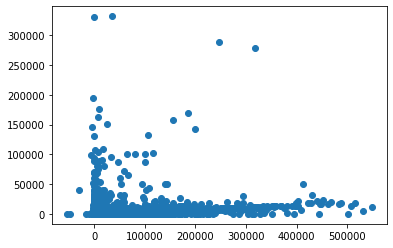

In [77]:
x = creditDefaultTrue['BILL_AMT5']
y = creditDefaultTrue['PAY_AMT5']
plt.scatter(x,y)
plt.show()

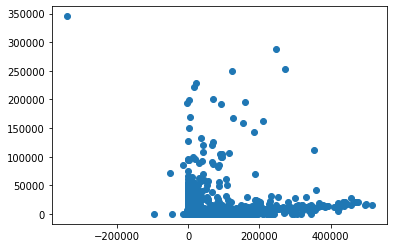

In [78]:
x = creditDefaultTrue['BILL_AMT6']
y = creditDefaultTrue['PAY_AMT6']
plt.scatter(x,y)
plt.show()

## Defaulted  Accounts Limits

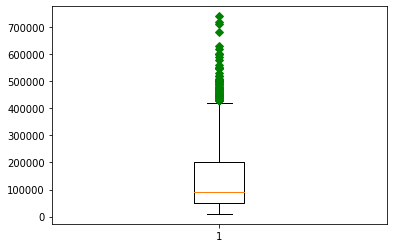

In [80]:
A = creditDefaultTrue['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

## Non-Defaulted Account Limits

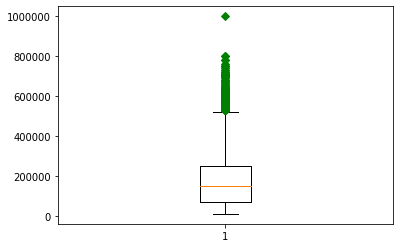

In [82]:
creditDefaultFalse = creditDefault[creditDefault['default payment next month'] == 0]
A = creditDefaultFalse['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

## Distribution of Age in Defaulted and then Non Defaulted Accounts

Text(0.5, 1.0, "Distribution of Default Customers' Ages")

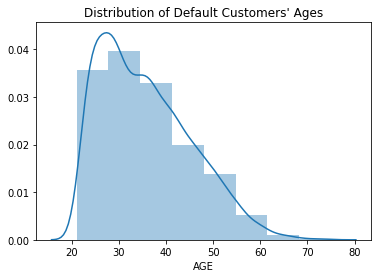

In [95]:
ageDefault = creditDefaultTrue['AGE']
age_dist = sns.distplot(ageDefault, bins = 8)
age_dist.set_title("Distribution of Default Customers' Ages")

Text(0.5, 1.0, "Distribution of Paid Customers' Ages")

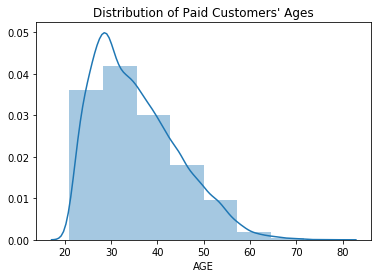

In [96]:
ageDefaultFalse = creditDefaultFalse['AGE']
age_dist = sns.distplot(ageDefaultFalse, bins = 8)
age_dist.set_title("Distribution of Paid Customers' Ages")

# Education Distributions

Text(0.5, 1.0, "Distribution of Default Customers' Education Levels")

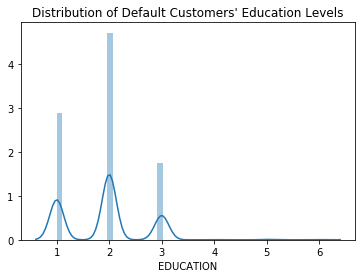

In [97]:
educationDefault = creditDefaultTrue['EDUCATION']
educ_dist = sns.distplot(educationDefault)
educ_dist.set_title("Distribution of Default Customers' Education Levels")

Text(0.5, 1.0, "Distribution of Paid Customers' Education Levels")

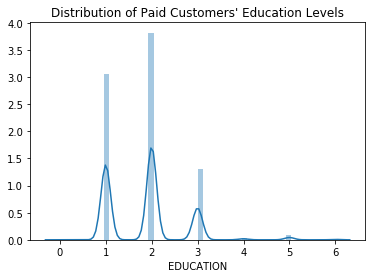

In [98]:
educationPaid = creditDefaultFalse['EDUCATION']
educ_dist = sns.distplot(educationPaid)
educ_dist.set_title("Distribution of Paid Customers' Education Levels")

## Limit Distributions

Text(0.5, 1.0, "Distribution of Defaulted Customers' Limits")

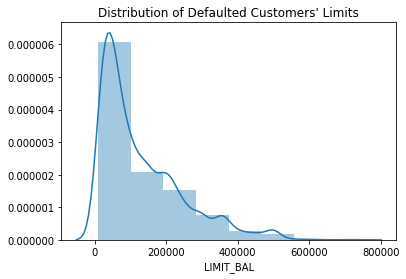

In [101]:
limDefault = creditDefaultTrue['LIMIT_BAL']
lim_dist = sns.distplot(limDefault, bins = 8)
lim_dist.set_title("Distribution of Defaulted Customers' Limits")

Text(0.5, 1.0, "Distribution of Paid Customers' Limits")

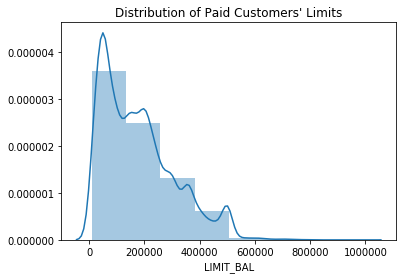

In [102]:
limPaid = creditDefaultFalse['LIMIT_BAL']
lim_dist = sns.distplot(limPaid, bins = 8)
lim_dist.set_title("Distribution of Paid Customers' Limits")

## Bill Amount 6 Distribution Defaulted Customers

Text(0.5, 1.0, 'Final Bill Amount')

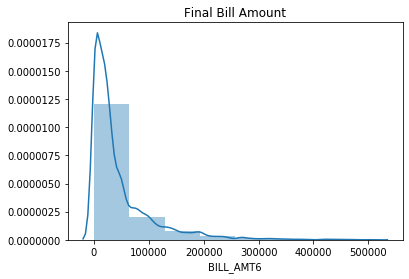

In [120]:
finalBill = creditDefaultTrue['BILL_AMT6']
bill_dist = sns.distplot(finalBill, bins = 8)
bill_dist.set_title("Final Bill Amount")

Text(0.5, 1.0, 'Final Bill Amount')

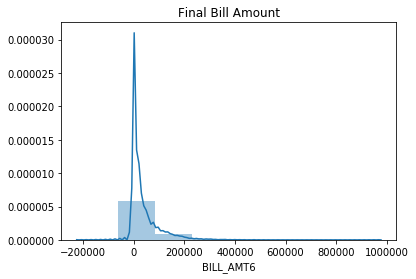

In [119]:
finalBill = creditDefaultFalse['BILL_AMT6']
bill_dist = sns.distplot(finalBill, bins = 8)
bill_dist.set_title("Final Bill Amount")

## History of Payment and Defaults

In [125]:
creditDefault.groupby(['PAY_0', 'default payment next month']) ['PAY_0'].count()

PAY_0  default payment next month
-2     0                              2394
       1                               365
-1     0                              4732
       1                               954
 0     0                             12849
       1                              1888
 1     0                              2436
       1                              1252
 2     0                               823
       1                              1844
 3     0                                78
       1                               244
 4     0                                24
       1                                52
 5     0                                13
       1                                13
 6     0                                 5
       1                                 6
 7     0                                 2
       1                                 7
 8     0                                 8
       1                                11
Name: PAY_0, dtype: 

In [126]:
creditDefault.groupby(['PAY_2', 'default payment next month']) ['PAY_2'].count()

PAY_2  default payment next month
-2     0                              3091
       1                               691
-1     0                              5084
       1                               966
 0     0                             13227
       1                              2503
 1     0                                23
       1                                 5
 2     0                              1743
       1                              2184
 3     0                               125
       1                               201
 4     0                                49
       1                                50
 5     0                                10
       1                                15
 6     0                                 3
       1                                 9
 7     0                                 8
       1                                12
 8     0                                 1
Name: PAY_2, dtype: int64

In [127]:
creditDefault.groupby(['PAY_3', 'default payment next month']) ['PAY_3'].count()

PAY_3  default payment next month
-2     0                              3328
       1                               757
-1     0                              5012
       1                               926
 0     0                             13013
       1                              2751
 1     0                                 3
       1                                 1
 2     0                              1850
       1                              1969
 3     0                               102
       1                               138
 4     0                                32
       1                                44
 5     0                                 9
       1                                12
 6     0                                 9
       1                                14
 7     0                                 5
       1                                22
 8     0                                 1
       1                                 2
Name: PAY_3, dtype: 

In [128]:
creditDefault.groupby(['PAY_4', 'default payment next month']) ['PAY_4'].count()

PAY_4  default payment next month
-2     0                              3511
       1                               837
-1     0                              4783
       1                               904
 0     0                             13439
       1                              3016
 1     0                                 1
       1                                 1
 2     0                              1506
       1                              1653
 3     0                                70
       1                               110
 4     0                                23
       1                                46
 5     0                                17
       1                                18
 6     0                                 3
       1                                 2
 7     0                                10
       1                                48
 8     0                                 1
       1                                 1
Name: PAY_4, dtype: 

In [129]:
creditDefault.groupby(['PAY_5', 'default payment next month']) ['PAY_5'].count()

PAY_5  default payment next month
-2     0                              3651
       1                               895
-1     0                              4642
       1                               897
 0     0                             13752
       1                              3195
 2     0                              1203
       1                              1423
 3     0                                65
       1                               113
 4     0                                33
       1                                51
 5     0                                 7
       1                                10
 6     0                                 1
       1                                 3
 7     0                                10
       1                                48
 8     1                                 1
Name: PAY_5, dtype: int64

In [130]:
creditDefault.groupby(['PAY_6', 'default payment next month']) ['PAY_6'].count()

PAY_6  default payment next month
-2     0                              3914
       1                               981
-1     0                              4765
       1                               975
 0     0                             13217
       1                              3069
 2     0                              1365
       1                              1401
 3     0                                66
       1                               118
 4     0                                18
       1                                31
 5     0                                 6
       1                                 7
 6     0                                 5
       1                                14
 7     0                                 8
       1                                38
 8     1                                 2
Name: PAY_6, dtype: int64

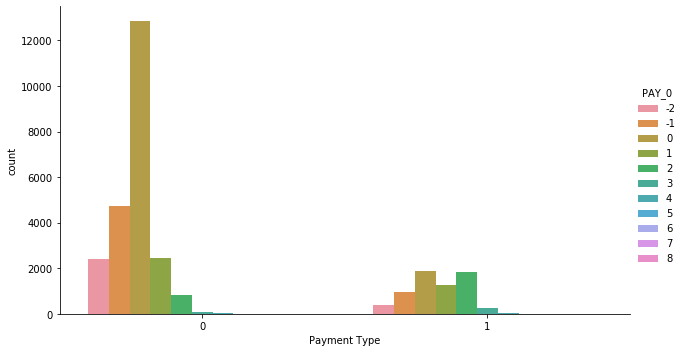

In [131]:
g = sns.factorplot('default payment next month', data=creditDefault, hue='PAY_0', kind='count', aspect=1.75)
g.set_xlabels('Payment Type')

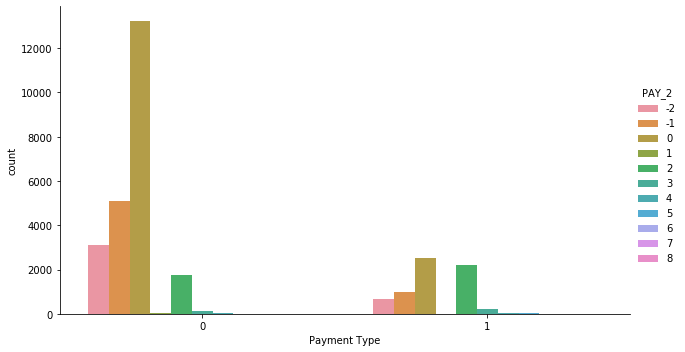

In [133]:
g = sns.factorplot('default payment next month', data=creditDefault, hue='PAY_2', kind='count', aspect=1.75)
g.set_xlabels('Payment Type')

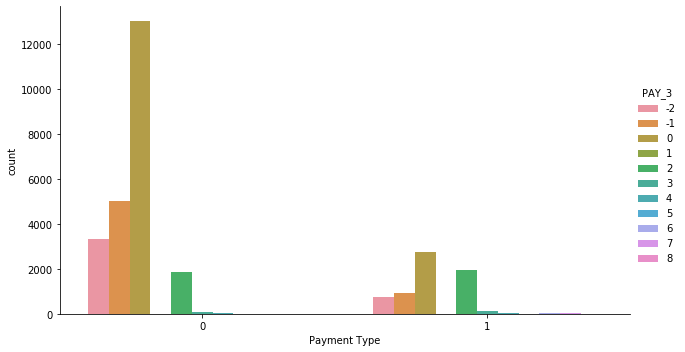

In [134]:
g = sns.factorplot('default payment next month', data=creditDefault, hue='PAY_3', kind='count', aspect=1.75)
g.set_xlabels('Payment Type')

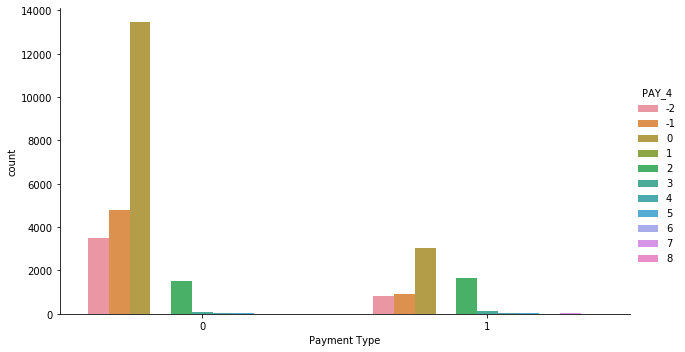

In [135]:
g = sns.factorplot('default payment next month', data=creditDefault, hue='PAY_4', kind='count', aspect=1.75)
g.set_xlabels('Payment Type')

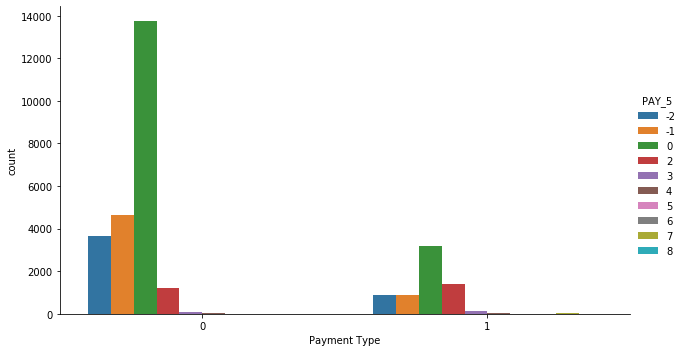

In [136]:
g = sns.factorplot('default payment next month', data=creditDefault, hue='PAY_5', kind='count', aspect=1.75)
g.set_xlabels('Payment Type')

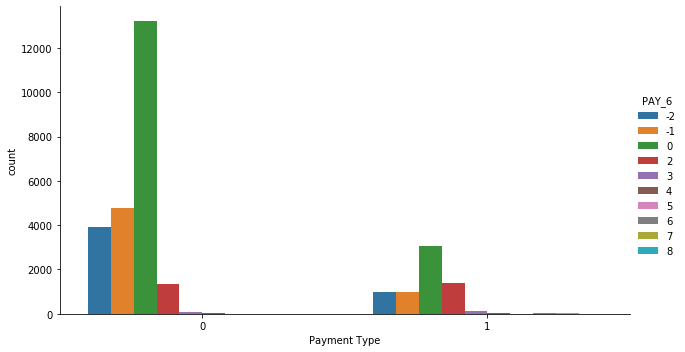

In [137]:
g = sns.factorplot('default payment next month', data=creditDefault, hue='PAY_6', kind='count', aspect=1.75)
g.set_xlabels('Payment Type')